In [1]:
from utils.Dataset import DatasetLoader
import cv2
import matplotlib.pyplot as plt
from loss import YOLOLoss
import numpy as np

In [2]:
loader = DatasetLoader('./dataset/train', 448, 7, 20)
train_ds = loader.get_dataset(1)

In [3]:
class_dict = {
    0: "aeroplane",
    1: "bicycle",
    2: "bird",
    3: "boat",
    4: "bottle",
    5: "bus",
    6: "car",
    7: "cat",
    8: "chair",
    9: "cow",
    10: "diningtable",
    11: "dog",
    12: "horse",
    13: "motorbike",
    14: "person",
    15: "pottedplant",
    16: "sheep",
    17: "sofa",
    18: "train",
    19: "tvmonitor"
}

In [4]:
def label_parse(label, img):
    for x_cell in range(7):
        for y_cell in range(7):
            if label[x_cell][y_cell][4] != 0:
                box_info = label[x_cell][y_cell][:4]
                name = np.argmax(label[x_cell][y_cell][5:])
                center_x = (box_info[0] * 64) + (x_cell * 64)
                center_y = (box_info[1] * 64) + (y_cell * 64)

                w = box_info[2] * 448
                h = box_info[3] * 448
                
                c1 = (int(center_x - (w / 2)), int(center_y - (h / 2)))
                c2 = (int(center_x + (w / 2)), int(center_y + (h / 2)))
                
                img = cv2.rectangle(img, c1, c2, (255, 0, 0), 1)
                img = cv2.putText(image, class_dict[name], [c1[0], c1[1] + 25], color=(255, 0, 0), fontFace=cv2.FONT_ITALIC, fontScale=1)
    return img

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


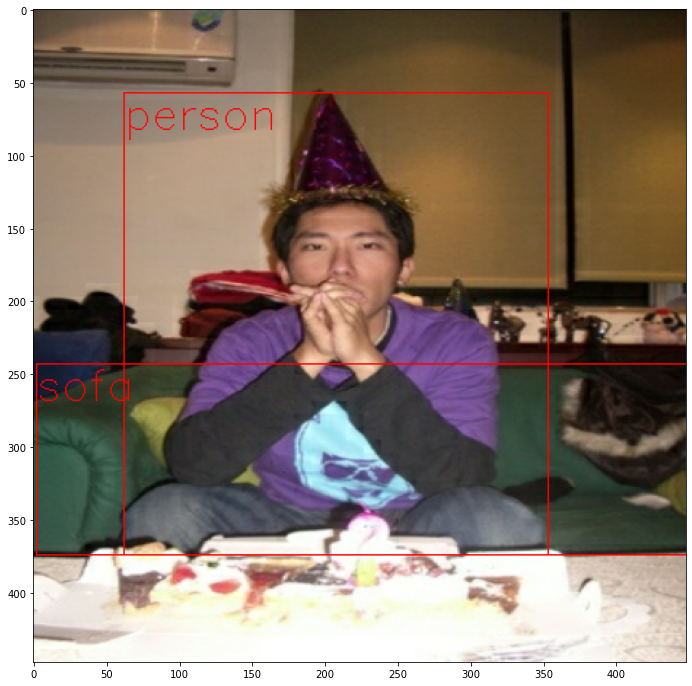

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


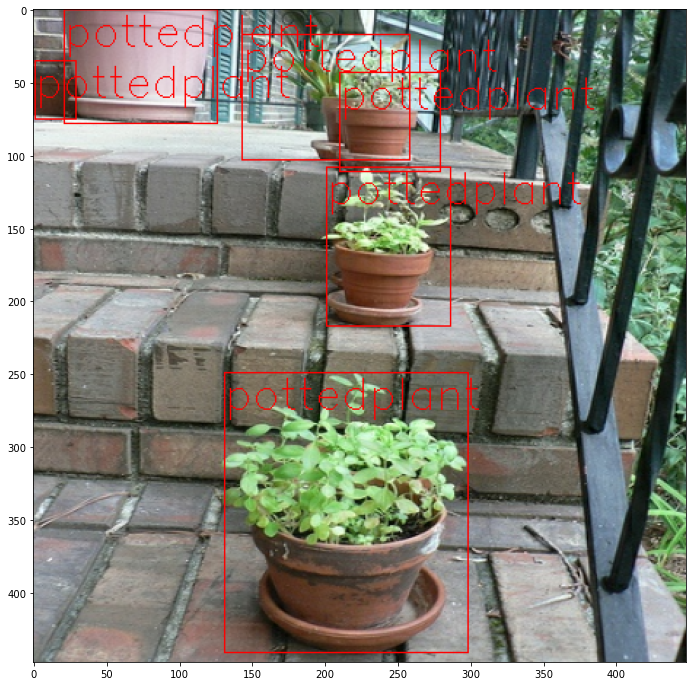

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


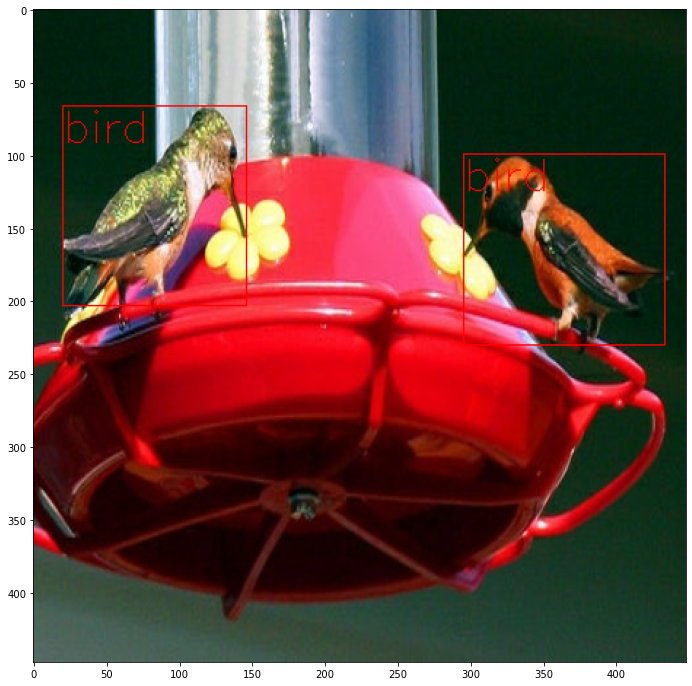

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


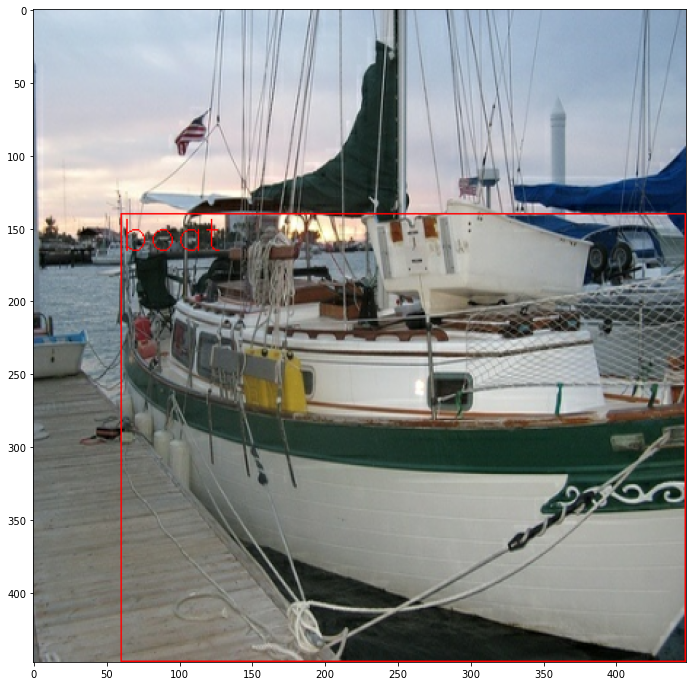

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


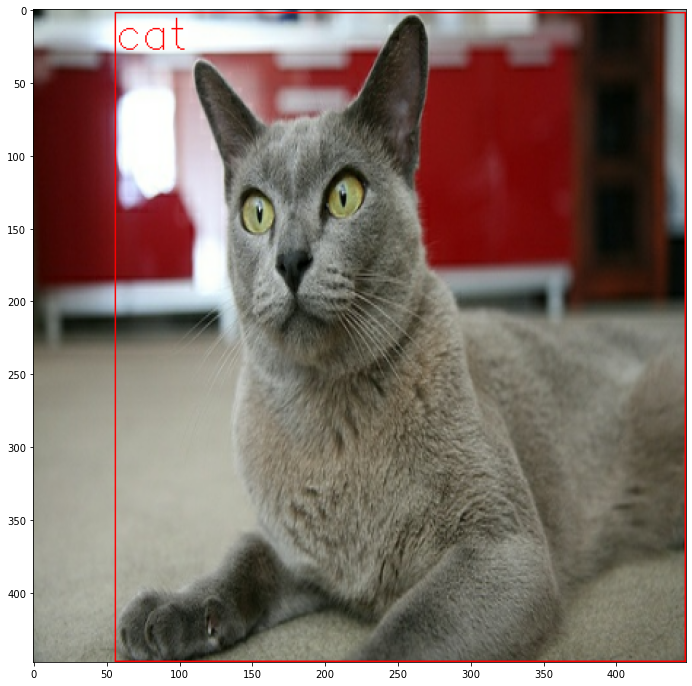

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


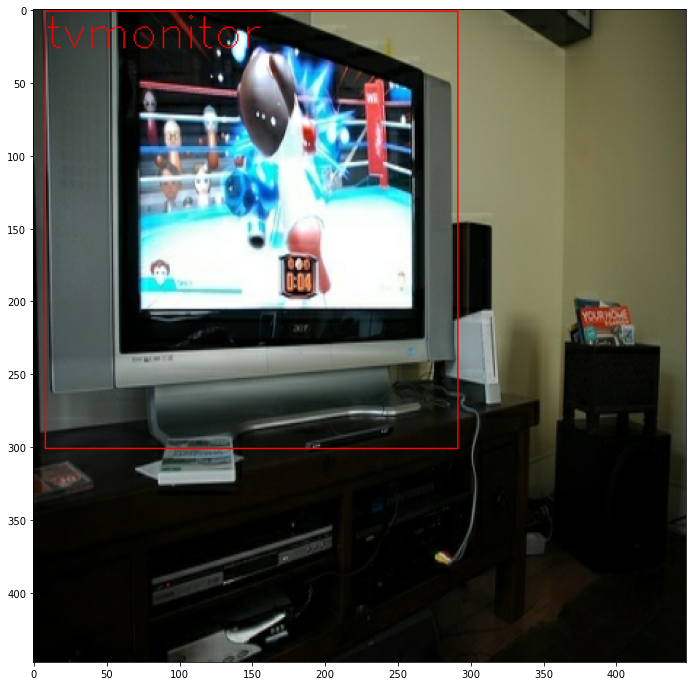

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


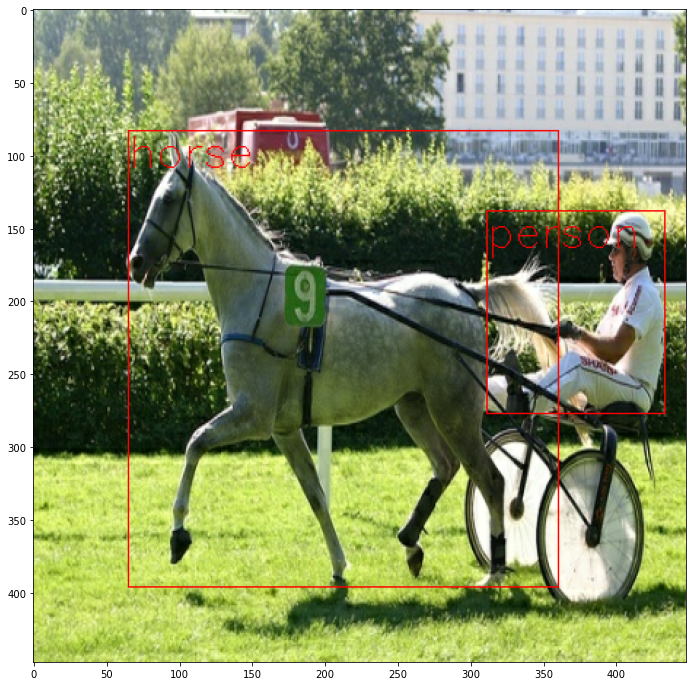

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


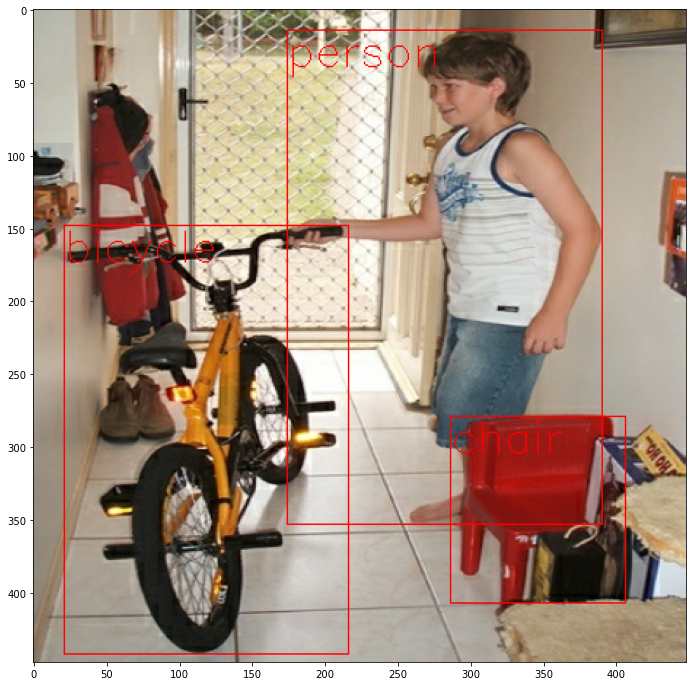

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


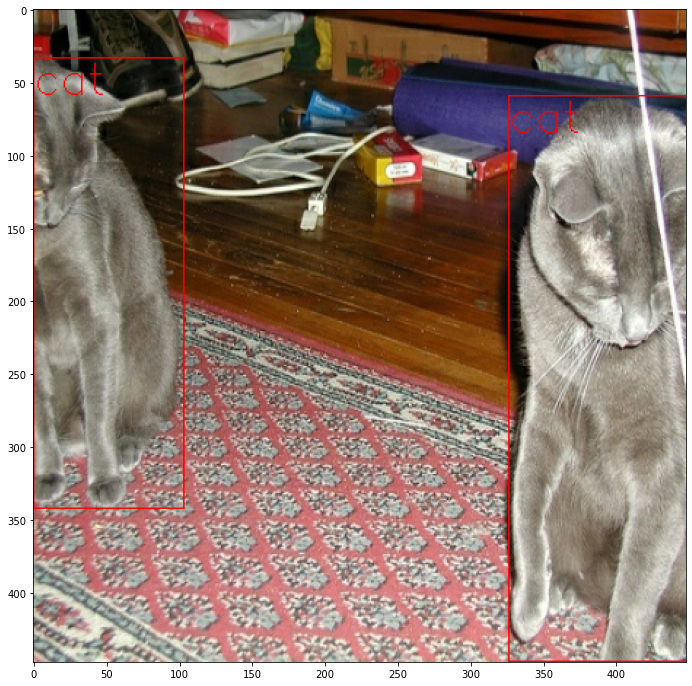

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


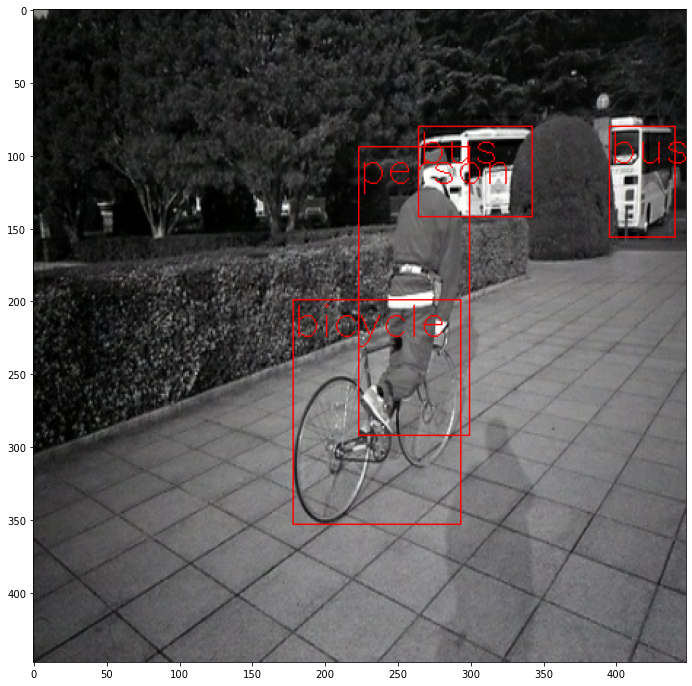

In [17]:
for i in train_ds.take(10):
    plt.figure(figsize=(12, 12))
    image = i[0][0].numpy()
    label = i[1][0].numpy()
    
    image = label_parse(label, image)
    plt.imshow(image)
    plt.show()

In [6]:
loss = YOLOLoss.get_yolo_loss(448, 7)

In [7]:
import tensorflow as tf

temp = tf.random.normal(shape=(1, 7, 7, 30))

In [8]:
loss(i[1], temp)

<tf.Tensor: shape=(), dtype=float32, numpy=248.00356>